Testing fix to build_index to address https://github.com/OceansAus/cosima-cookbook/issues/95

In [1]:
import cosima_cookbook as cc

netcdf_index loaded.


In [2]:
cc.build_index()

Finding runs on disk... found 7921 run directories
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook-test.db
Querying database for directories... run directories already indexed: 9137
Finding files in 11 run directories... 


Files found but not yet indexed: 0
No new .nc files found.


True

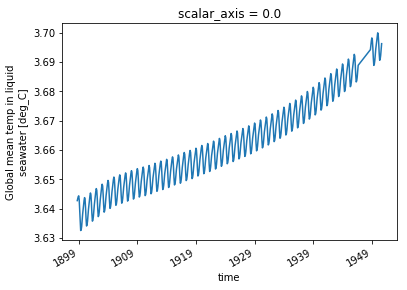

In [4]:
cc.get_nc_variable('025deg_jra55v13_ryf8485_KDS50', 'ocean_scalar.nc',
                   'temp_global_ave',n=25,time_units='days since 1900-01-01').plot()

In [5]:
cc.build_index(careful=True)


Indexed 26745 variables found in new files
Saving results in database... 
Indexing complete.


True

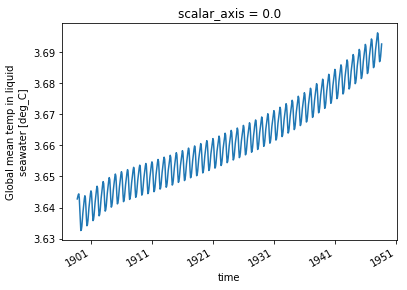

In [6]:
cc.get_nc_variable('025deg_jra55v13_ryf8485_KDS50', 'ocean_scalar.nc',
                   'temp_global_ave',n=25,time_units='days since 1900-01-01').plot()

In [ ]:
STOPHERE

In [4]:
import dataset
db = dataset.connect('sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db')

In [5]:
%%time
rf = db.query('SELECT DISTINCT ncfile FROM ncfiles')

CPU times: user 2 ms, sys: 1e+03 µs, total: 3 ms
Wall time: 10 ms


In [4]:
%%time
files_already_seen = {n['ncfile']:None for n in rf} # use to a dict for fast lookup

In [6]:
%%time
files_already_seen = set([row['ncfile'] for row in rf])

CPU times: user 1min 16s, sys: 9.32 s, total: 1min 25s
Wall time: 1min 25s


In [ ]:
rf.next()

In [5]:
%%time
'bla' in files_already_seen

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16.2 µs


False

In [6]:
%%time
'/g/data3/hh5/tmp/cosima/mom01v5/KDS75/output205/rregionoceankerg__0054_276.nc' in files_already_seen

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 42.4 µs


True